# **SEA ICE MELTING PREDICTION**

### Setup

In [3]:
# Step 1: Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the sea ice extent data
file_path = '/content/N_03_extent_v3.0.csv'
df = pd.read_csv(file_path)

# Step 3: Peek at the first few rows
print(df.head())
print()
# Step 4: Check columns and info
print(df.columns)
print()
print(df.info())
print()
# Step 5: Check for missing values
print(df.isnull().sum())


   year   mo      data-type   region   extent     area
0  1979    3        Goddard        N    16.34    13.21
1  1980    3        Goddard        N    16.04    12.99
2  1981    3        Goddard        N    15.63    12.71
3  1982    3        Goddard        N    16.04    13.07
4  1983    3        Goddard        N    16.09    12.93

Index(['year', ' mo', '    data-type', ' region', ' extent', '   area'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           47 non-null     int64  
 1    mo            47 non-null     int64  
 2       data-type  47 non-null     object 
 3    region        47 non-null     object 
 4    extent        47 non-null     float64
 5      area        47 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.3+ KB
None

year             0
 mo              0
    data-type    0


### Data Cleaning and Preprocessing

In [4]:
# Step 1: Clean column names (remove weird spaces)
df.columns = df.columns.str.strip()

# Step 2: Drop unnecessary columns
df = df.drop(columns=['data-type', 'region'])

# Step 3: Create a proper 'Date' column
df['Date'] = pd.to_datetime(dict(year=df['year'], month=df['mo'], day=1))

# Step 4: Set 'Date' as the index
df.set_index('Date', inplace=True)

# Step 5: Keep only important columns (Extent and optionally Area)
df = df[['extent']]  # for now, we focus on extent only

print(df.head())
print()
print()
print(df.info())

            extent
Date              
1979-03-01   16.34
1980-03-01   16.04
1981-03-01   15.63
1982-03-01   16.04
1983-03-01   16.09


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 1979-03-01 to 2025-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   extent  47 non-null     float64
dtypes: float64(1)
memory usage: 752.0 bytes
None


Reason of setting the Date coloum as index

* We set the date as the index because time series is "data that depends on when it happens."Models need to know the timing and order to predict properly.

(Without a Date index, it's just a random table, not a time series!)

## **EDA** (Exploratory Data Analysis) and **Visualization**


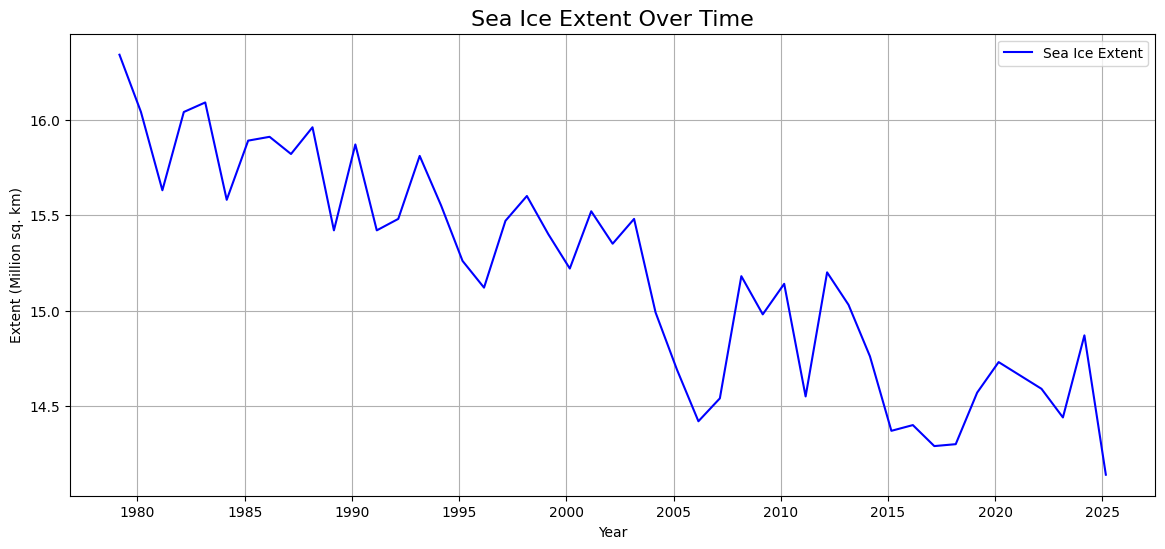

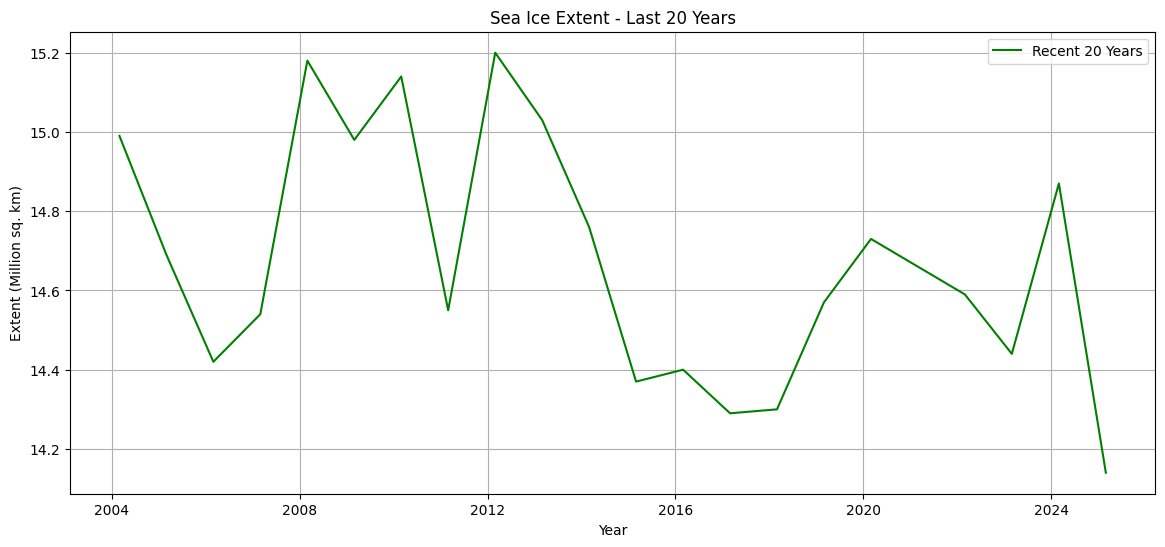

In [5]:
import matplotlib.pyplot as plt

# Basic line plot of sea ice extent over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['extent'], label='Sea Ice Extent', color='blue')
plt.title('Sea Ice Extent Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Extent (Million sq. km)')
plt.legend()
plt.grid(True)
plt.show()

# Zoom into recent years (optional)
df_recent = df[df.index >= '2004-01-01']  #shorten time
plt.figure(figsize=(14,6))
plt.plot(df_recent.index, df_recent['extent'], label='Recent 20 Years', color='green')
plt.title('Sea Ice Extent - Last 20 Years')
plt.xlabel('Year')
plt.ylabel('Extent (Million sq. km)')
plt.legend()
plt.grid(True)
plt.show()


## **Models**

###First model
**Polynomial Regression**

->Polynomial Regression Forecasting

* Supporting areas
 *  Fit a smooth curve (trendline) over the historical data.

 *  Predict next ~10-20 years into the future.

 *  Visualize and evaluate how good/bad a simple model does.



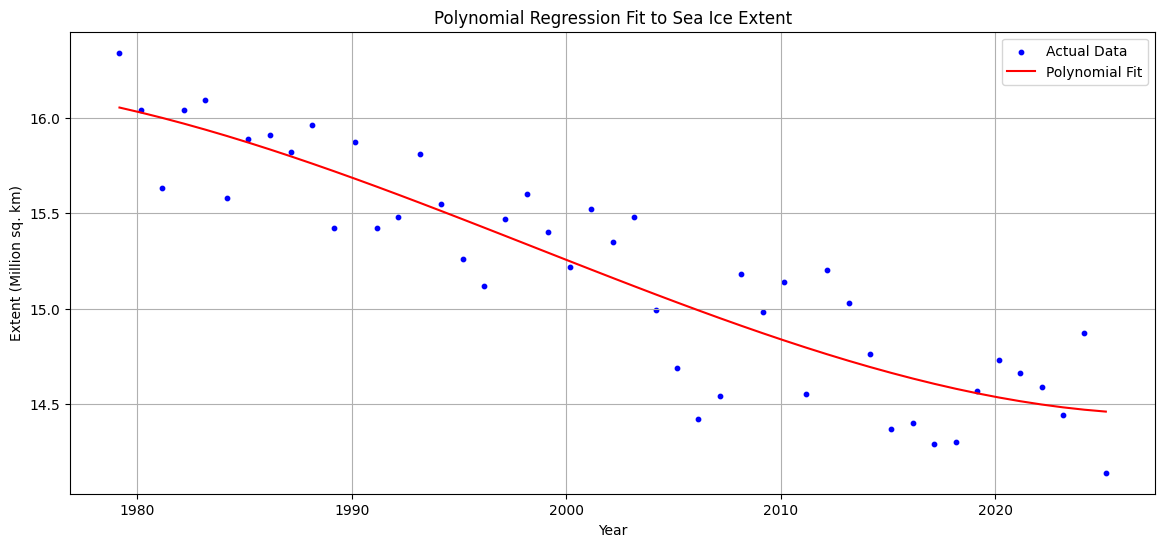

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Step 1: Prepare the X and y
df['YearFloat'] = df.index.year + (df.index.month - 1) / 12  # Convert year+month into a float (e.g., 2020.5)

X = df['YearFloat'].values.reshape(-1, 1)
y = df['extent'].values

# Step 2: Create Polynomial Features (degree 2 or 3 usually good)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Step 3: Fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict on historical data
y_pred = model.predict(X_poly)

# Step 5: Plot actual vs. fitted
plt.figure(figsize=(14,6))
plt.scatter(X, y, color='blue', label='Actual Data', s=10)
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.title('Polynomial Regression Fit to Sea Ice Extent')
plt.xlabel('Year')
plt.ylabel('Extent (Million sq. km)')
plt.legend()
plt.grid(True)
plt.show()


Predict Future Sea Ice Extent

*   Generate future years (e.g., **2025–2045**)

*   Use the same **poly.transform()** to create **polynomial features**

*   Predict **future** extents using **model.predict()**

*   Ploting both the **historical** and **future** predictions together

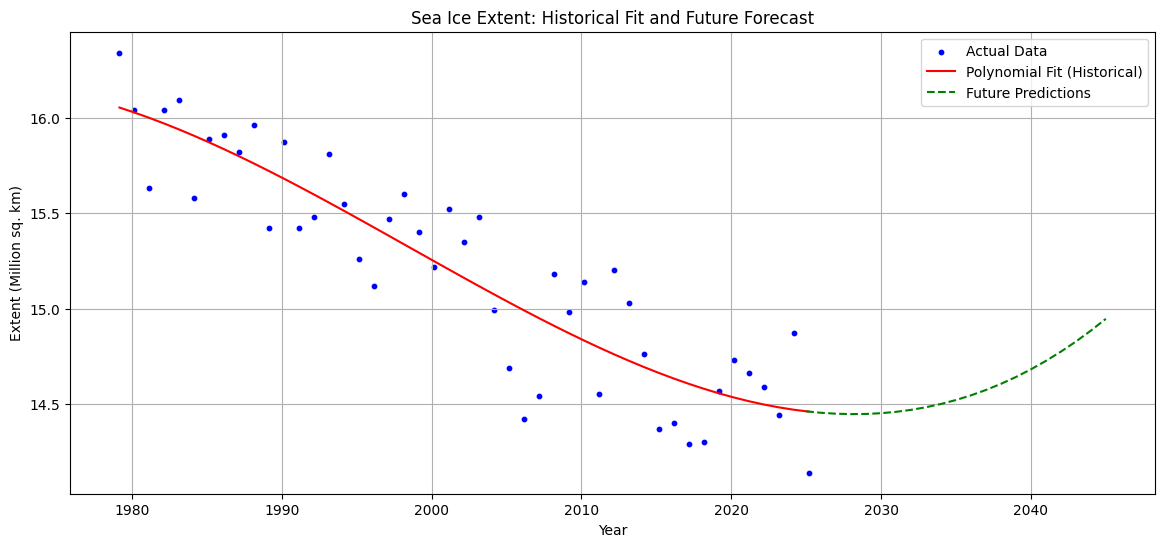

In [ ]:
# Step 1: Create future years
future_years = np.arange(2025, 2046, 1)  # From 2025 to 2045
future_years = future_years.reshape(-1, 1)

# Step 2: Transform future years into polynomial features
future_years_poly = poly.transform(future_years)

# Step 3: Predict future extents
future_preds = model.predict(future_years_poly)

# Step 4: Plot both historical and future predictions
plt.figure(figsize=(14, 6))
plt.scatter(X, y, color='blue', label='Actual Data', s=10)
plt.plot(X, y_pred, color='red', label='Polynomial Fit (Historical)')
plt.plot(future_years, future_preds, color='green', linestyle='--', label='Future Predictions')
plt.title('Sea Ice Extent: Historical Fit and Future Forecast')
plt.xlabel('Year')
plt.ylabel('Extent (Million sq. km)')
plt.legend()
plt.grid(True)
plt.show()

Why it suddenly increases?

Because we used a Polynomial Regression model (degree 3), and polynomials (especially degree 3+) naturally curve:


*   They don't "know" physics, climate science, or natural limits.

*   The model simply tries to fit the trend it has learned mathematically.

* In a cubic (degree=3) curve, it's common to see a downward dip followed by an upward rise.

Calculating **RMSE** and **R²** for this model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse:.3f}")

# Calculate R²
r2 = r2_score(y, y_pred)
print(f"R-squared (R²): {r2:.3f}")


Root Mean Square Error (RMSE): 0.250
R-squared (R²): 0.810


it means my project is:

RMSE: 0.250: On average, the model's predictions are about **0.25** million sq km off from the true values.

R²: .810: The model explains **81%** of the **variance** in sea ice extent over time.

### ARIMA

**A**uto **R**egressive **I**ntegrated **M**oving **A**verage (**ARIMA**)

*   AR (AutoRegression): Using past values to predict future.
*   I (Integration): Differencing the data to make it stable (stationary).
*  MA (Moving Average): Using past errors to predict future.

Better for long term forcasting and Perfect for trends.

Checking **Stationarity** needed to apply **ARIMA** using

**ADF** (Augmented Dickey-Fuller) Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Step 1: Perform ADF test
result = adfuller(df['extent'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Step 2: Interpret
if result[1] <= 0.05:
    print("Data is stationary (good for ARIMA)")
else:
    print("Data is non-stationary (need differencing)")


ADF Statistic: -0.2440836278644449
p-value: 0.9330588878548277
Data is non-stationary (need differencing)


Data is non-stationary so differencing it.

In [ ]:
# Step 1: Difference the data
df['extent_diff'] = df['extent'].diff()

# Step 2: Drop missing first value
df_diff = df['extent_diff'].dropna()

# Step 3: Check stationarity again
result_diff = adfuller(df_diff)

print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

# Step 4: Interpret
if result_diff[1] <= 0.05:
    print("Data is now stationary after differencing")
else:
    print("Data is still non-stationary, might need 2nd differencing")


ADF Statistic after differencing: -6.725905673054885
p-value after differencing: 3.390311183411817e-09
Data is now stationary after differencing


**Choose** (p, d, q) parameters

In [ ]:
!pip install pmdarima --upgrade --quiet


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fit ARIMA(1,1,1) model
model_arima = ARIMA(df['extent'], order=(1,1,1))
model_fit = model_arima.fit()

# Step 2: Print the model summary
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-MAR will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-MAR will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-MAR will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 extent   No. Observations:                   47
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -9.554
Date:                Sat, 26 Apr 2025   AIC                             25.108
Time:                        19:26:28   BIC                             30.594
Sample:                    03-01-1979   HQIC                            27.163
                         - 03-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1826      0.316      0.578      0.564      -0.437       0.802
ma.L1         -0.6547      0.238     -2.749      0.006      -1.121      -0.188
sigma2         0.0880      0.024      3.718      0.0

Forecast future sea ice extent

<ipython-input-64-faa17f75d685>:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=n_years, freq='Y')


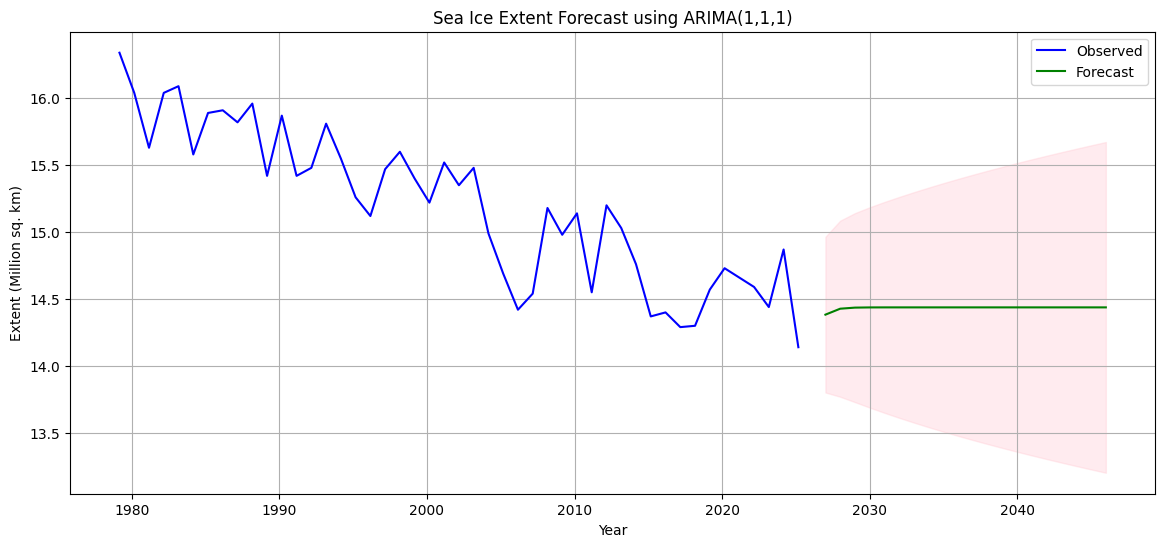

In [ ]:
# Step 1: Forecast next 20 years (adjust steps if needed)
n_years = 20
forecast = model_fit.get_forecast(steps=n_years)

# Step 2: Get prediction mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

#plotting
plt.figure(figsize=(14,6))

# Historical data
plt.plot(df.index, df['extent'], label='Observed', color='blue')

# Forecasted data
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=n_years, freq='Y')
plt.plot(future_dates, forecast_mean, label='Forecast', color='green')

# Confidence interval shading
plt.fill_between(future_dates,
                 forecast_conf_int.iloc[:,0],
                 forecast_conf_int.iloc[:,1],
                 color='pink', alpha=0.3)

plt.title('Sea Ice Extent Forecast using ARIMA(1,1,1)')
plt.xlabel('Year')
plt.ylabel('Extent (Million sq. km)')
plt.legend()
plt.grid(True)
plt.show()


Calculate RMSE and R² for ARIMA:


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Predict on training data
y_pred_arima = model_fit.predict(start=0, end=len(df)-1, typ='levels')  # Predict on training data

# Step 2: Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(df['extent'], y_pred_arima))
print(f"Root Mean Square Error (RMSE): {rmse_arima:.3f}")

# Step 3: Calculate R²
r2_arima = r2_score(df['extent'], y_pred_arima)
print(f"R²: {r2_arima:.3f}")


Root Mean Square Error (RMSE): 2.402
R²: -16.510


ARIMA found worse than Polynomial on **our dataset **

### Prophet

For better we gonna shift to Prophet now

Installing and Prepare for Prophet

In [6]:
# Step 1: Install Prophet (if not already installed)
!pip install prophet --quiet

# Step 2: Import Prophet
from prophet import Prophet

# Step 3: Prepare the data for Prophet
df_prophet = df.reset_index()[['Date', 'extent']]  # Reset index to get Date column back
df_prophet.columns = ['ds', 'y']  # Prophet expects columns named 'ds' and 'y'

# Step 4: Peek at the new DataFrame
print(df_prophet.head())


          ds      y
0 1979-03-01  16.34
1 1980-03-01  16.04
2 1981-03-01  15.63
3 1982-03-01  16.04
4 1983-03-01  16.09


Fitting Prophet

Building Prophet

In [7]:
# Step 1: Initialize Prophet model
model_prophet = Prophet()

# Step 2: Fit Prophet model on the data
model_prophet.fit(df_prophet)

# Step 3: Create a DataFrame to hold future dates (20 years into future)
future = model_prophet.make_future_dataframe(periods=20, freq='Y')  # 20 years into the future

# Step 4: Make predictions
forecast = model_prophet.predict(future)

# Step 5: See a few prediction results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq4gepc3h/4g0nweq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq4gepc3h/qr3mgc0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80535', 'data', 'file=/tmp/tmpq4gepc3h/4g0nweq6.json', 'init=/tmp/tmpq4gepc3h/qr3mgc0j.json', 'output', 'file=/tmp/tmpq4gepc3h/prophet_modelfy5il73_/prophet_model-20250427131238.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:12:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

,ds,yhat,yhat_lower,yhat_upper
62,2040-12-31,-3.113538,-3.425633,-2.788460
63,2041-12-31,-3.265989,-3.588446,-2.950958
64,2042-12-31,-3.416937,-3.749481,-3.104653
65,2043-12-31,-3.566188,-3.869278,-3.252062
66,2044-12-31,-3.252162,-3.576857,-2.928423


Plotting the Forcast

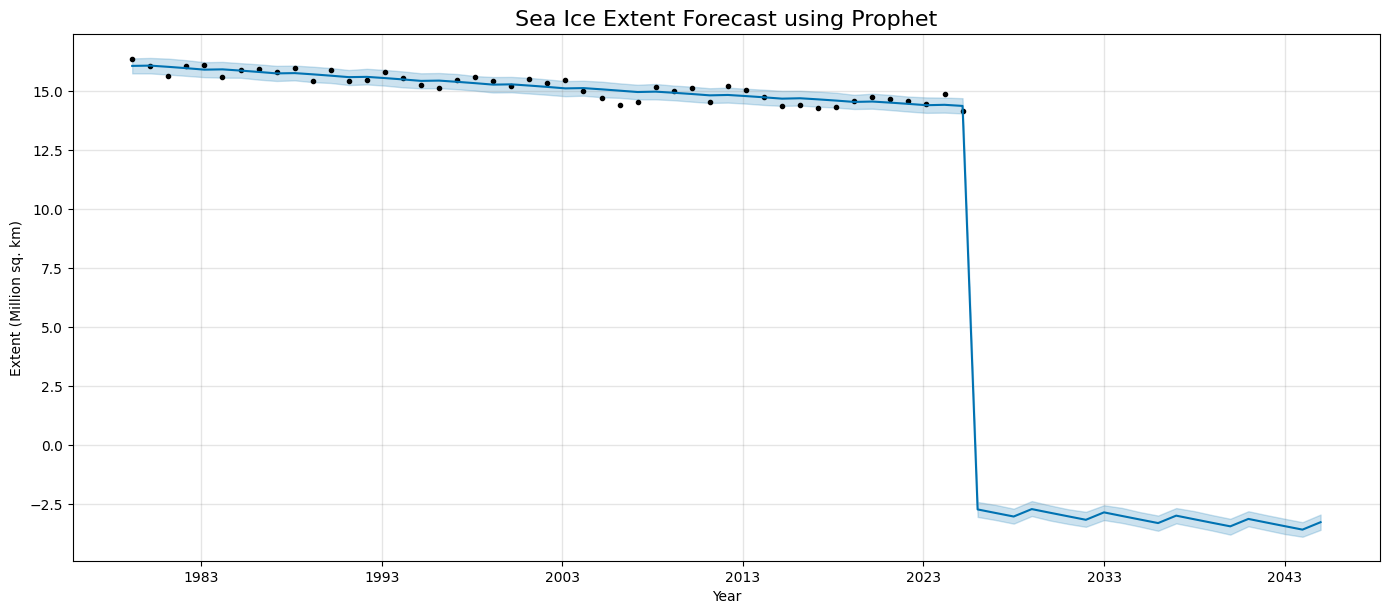

In [8]:
# Step 1: Plot the forecast
fig = model_prophet.plot(forecast, figsize=(14, 6))

# Step 2: Customize the plot a little
plt.title('Sea Ice Extent Forecast using Prophet', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Extent (Million sq. km)')
plt.grid(True)
plt.show()

#### Post procesing data

Clip Prophet Forecast to Remove Negative Values

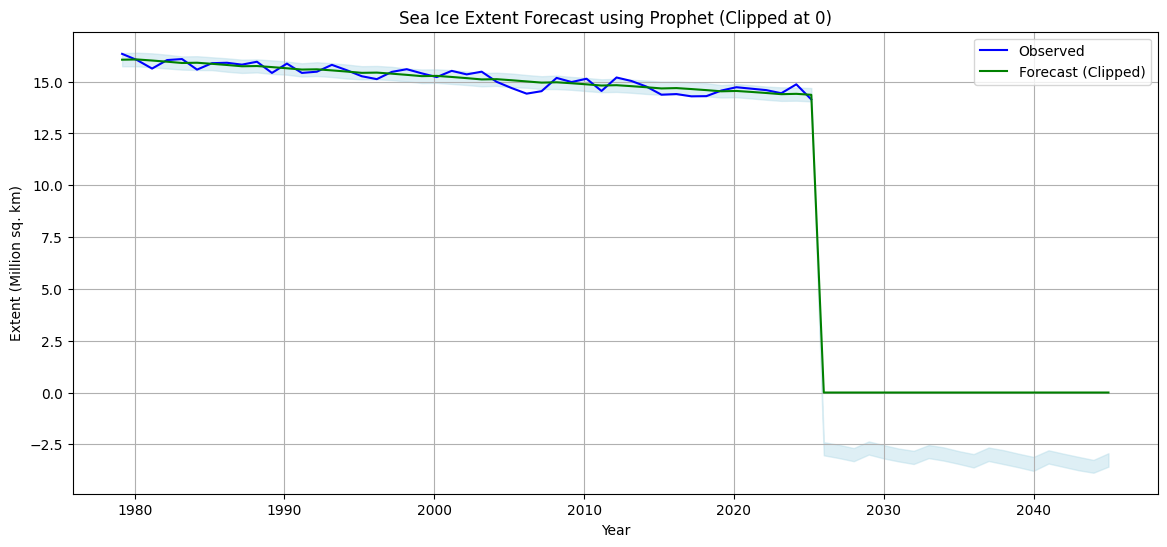

In [9]:
# Step 1: Clip negative values at 0
forecast['yhat_clipped'] = forecast['yhat'].clip(lower=0)

# Step 2: Plot again
plt.figure(figsize=(14,6))

# Plot historical data
plt.plot(df_prophet['ds'], df_prophet['y'], label='Observed', color='blue')

# Plot clipped forecast
plt.plot(forecast['ds'], forecast['yhat_clipped'], label='Forecast (Clipped)', color='green')

# Confidence interval
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='lightblue', alpha=0.4)

plt.title('Sea Ice Extent Forecast using Prophet (Clipped at 0)')
plt.xlabel('Year')
plt.ylabel('Extent (Million sq. km)')
plt.legend()
plt.grid(True)
plt.show()


Comparing its RMSE and R²

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Merge actuals and predictions (for training period only)
train_forecast = forecast.set_index('ds').loc[df_prophet['ds']]  # Match forecasted dates to historical dates

# Step 2: Calculate RMSE and R²
rmse_prophet = np.sqrt(mean_squared_error(df_prophet['y'], train_forecast['yhat']))
r2_prophet = r2_score(df_prophet['y'], train_forecast['yhat'])

print(f"Root Mean Square Error (RMSE): {rmse_prophet:.3f}")
print(f"R-squared (R²): {r2_prophet:.3f}")


Root Mean Square Error (RMSE): 0.251
R-squared (R²): 0.808
